# S3. Introduction to Descriptive Statistics.

<img src="Figures/stats1.png" alt="Drawing" style="width: 600px;"/>

### CONTENTS 
* 1. Sample vs Population
* 2. Summary and data cleaning
* 3. Descriptive Statistics visualization

## 1. Sample vs. Population

We will usually find ourselves in a situation where we wish to answer questions about a certain *population* but only have access to a *sample*.

<img src="Figures/Poblacion1.svg" alt="Drawing" style="width: 450px;"/>

* The **population** refers to all individuals who are relevant to a particular question or study, whereas a **sample** will be just a subset of these. 
* For example, all the customers of a distribution company will be the population, whereas for a study we may only use a sample of them. Sometimes what for one question is a *population*, for another will be a sample (in our example all the customers of a distribution company are just a sample of the population of a country).

<img src="Figures/Poblacion2.svg" alt="Drawing" style="width: 450px;"/>

Populations and samples are made up of several observations, individuals, elements, etc.

<img src="Figures/Poblacion3.svg" alt="Drawing" style="width: 450px;"/>

Whenever possible, it will be better to use the population to answer our questions, but sometimes this is not possible (you do not have all the data, not all customers have a Smart meter, collecting all the data from the same source is difficult, etc.). In these cases we will use a sample. 

What is the problem with this? Let's see an example, with our London dataset

In [2]:
import pandas as pd # Pandas!
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


london = pd.read_csv('Data/block_13_diario.csv')
london.head(10)

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000113,2011-12-14,1.0910,1.065250,1.674,28,0.305397,29.827,0.262
1,MAC000113,2011-12-15,0.3710,0.546521,1.434,48,0.410120,26.233,0.119
2,MAC000113,2011-12-16,0.3205,0.534708,2.034,48,0.464431,25.666,0.129
3,MAC000113,2011-12-17,0.2570,0.421500,1.068,48,0.274387,20.232,0.115
4,MAC000113,2011-12-18,0.3985,0.565333,2.218,48,0.450712,27.136,0.134
5,MAC000113,2011-12-19,0.6980,0.746479,2.204,48,0.488694,35.831,0.131
6,MAC000113,2011-12-20,0.2485,0.436354,1.551,48,0.362781,20.945,0.139
7,MAC000113,2011-12-21,0.2050,0.426542,1.818,48,0.477511,20.474,0.119
8,MAC000113,2011-12-22,0.1830,0.181854,0.259,48,0.040321,8.729,0.119
9,MAC000113,2011-12-23,0.1860,0.185646,0.268,48,0.040754,8.911,0.121


In [3]:
london.describe()

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
count,32992.000000,32992.000000,32992.000000,32992.000000,32865.000000,32992.000000,32992.000000
mean,0.165632,0.223007,0.879596,47.776128,0.182819,10.660024,0.064419
std,0.158396,0.178484,0.672407,3.035524,0.147394,8.565058,0.076632
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.052000,0.085432,0.348000,48.000000,0.069162,4.046000,0.016000
50%,0.118500,0.176844,0.775000,48.000000,0.149607,8.458000,0.035000
75%,0.225000,0.311276,1.248000,48.000000,0.264400,14.910500,0.093000
max,1.608000,1.407458,6.897000,48.000000,1.104101,67.558000,1.068000


Let's create two different samples

In [4]:
sample1 = london.iloc[1:50,4]
sample2 = london.iloc[1345:1854,4]

In [5]:
sample1.describe()

count    49.000000
mean      1.456020
std       0.632673
min       0.259000
25%       1.128000
50%       1.570000
75%       1.922000
max       2.653000
Name: energy_max, dtype: float64

In [6]:
sample2.describe()

count    509.000000
mean       1.630165
std        0.732034
min        0.066000
25%        1.013000
50%        1.676000
75%        2.115000
max        4.041000
Name: energy_max, dtype: float64

As can be seen, for each sample we obtain different metrics or statistics. This error is the *estimation error* or the *sampling error*. 




**Population mean (µ)**

In [7]:
mean_population = london['energy_max'].mean()
print('Mean population:',mean_population)

Mean population: 0.8795961444229009


**Samples mean (x̅)**

In [8]:
mean_sample1 = sample1.mean()
mean_sample2 = sample2.mean()

print('Mean sample 1:', mean_sample1)
print('Mean sample 2:', mean_sample2)

Mean sample 1: 1.4560204081632653
Mean sample 2: 1.6301650255402746


**Samples error**

In [9]:
error1 = mean_population - mean_sample1
error2 = mean_population - mean_sample2

print('Sample 1 error:',error1)
print('Sample 2 error:',error2)

Sample 1 error: -0.5764242637403644
Sample 2 error: -0.7505688811173737


If we do it for several samples, with the same number of observations in a random way, automatically:


`dataframe.sample()` method returns a random sample of items from an axis of object.

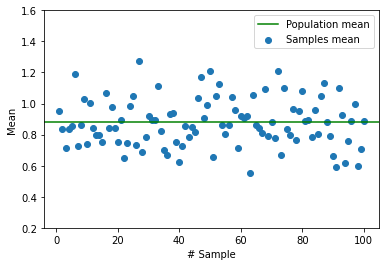

In [10]:
import matplotlib.pyplot as plt

num_obs = 20
num_samples = 100
list_mean=[]

for sample in range(num_samples):
    s = london['energy_max'].sample(num_obs, random_state=sample)
    list_mean.append(s.mean())
    
plt.scatter(range(1,101),list_mean, label= 'Samples mean')
plt.axhline(london['energy_max'].mean(), color='green', label = 'Population mean')

# Set fixed y-axis limits (change values as per your requirement)
plt.ylim(ymin=0.2, ymax=1.6)
plt.xlabel('# Sample')
plt.ylabel('Mean')
plt.legend()
plt.show()

### How can we solve this? 

One way is, as mentioned, to try to get as close as possible to the entire population. Let's look at our example:

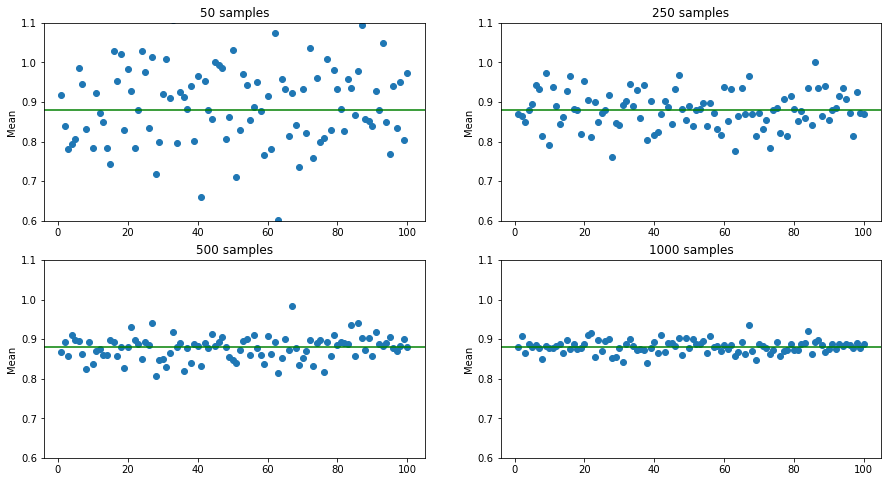

In [11]:
num_obs = 50
num_samples = 100
lists_mean=[]

for num_obs in [50,250,500,1000]:
    list_mean=[]
    for sample in range(num_samples):
        s = london['energy_max'].sample(num_obs, random_state = sample)
        list_mean.append(s.mean())
    lists_mean.append(list_mean)
    
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.scatter(range(1,101),lists_mean[0])
plt.axhline(london['energy_max'].mean(), color='green')
plt.ylim(0.6, 1.1)
plt.ylabel('Mean')
plt.title('50 samples')

plt.subplot(2,2,2)
plt.scatter(range(1,101),lists_mean[1])
plt.axhline(london['energy_max'].mean(), color='green')
plt.ylim(0.6, 1.1)
plt.ylabel('Mean')
plt.title('250 samples')

plt.subplot(2,2,3)
plt.scatter(range(1,101),lists_mean[2])
plt.axhline(london['energy_max'].mean(), color='green')
plt.ylim(0.6, 1.1)
plt.ylabel('Mean')
plt.title('500 samples')

plt.subplot(2,2,4)
plt.scatter(range(1,101),lists_mean[3])
plt.axhline(london['energy_max'].mean(), color='green')
plt.ylim(0.6, 1.1)
plt.ylabel('Mean')
plt.title('1000 samples')


# plt.subplot(2,2,4)
# plt.scatter(range(1,101),lists_mean[4], alpha=0.4)
# plt.axhline(london['energy_max'].mean(), color='green')
# plt.ylim(0.6, 1.1)
# plt.ylabel('Mean')
# plt.title('1800 samples')

plt.show()

We must also ensure that the sample is representative of the different possible categories in our dataset. For that you can use **stratified sampling**.

<img src="Figures/stratified_sampling.jpg" alt="Drawing" style="width: 450px;"/>

## 2. Data summary and data cleaning

Pandas offers us several options to obtain a summary of the data as the *describe* method seen above. In addition, we can use other methods such as:

<img src="Figures/pandas_summary.png" alt="Drawing" style="width: 450px;"/>

Other interesting options to obtain frequency distributions of the data in a column are the methods *value_counts* and *nunique*.

In [12]:
### Try some of these functions

london['energy_max'].sum()
london['energy_max'].max()

6.896999799999999

<div style="background-color:#ccffcc; padding:10px; border-radius:5px;">

### <span style="color:blue">Exercise 1</span>

Calculate standard deviation for MAC000113
    </div>

In [15]:
# write your code here
london.loc[london['LCLid']=='MAC000113']['energy_max'].std()


0.5588160014383909

### Data cleaning: treat the missing data

There are several options for dealing with empty values, but pandas offers us some quick and interesting options to go fast

<img src="Figures/missing.png" alt="Drawing" style="width: 450px;"/>

One tool that goes well for summarizing is the *pandas-profiling* library which summarizes the data in a *dataframe* and shows us interesting summarized and grouped results.


<div style="background-color:#ccffcc; padding:10px; border-radius:5px;">

### <span style="color:blue">Exercise 2</span>

How many missing data the london dataset have?
    </div>

In [17]:
# write your code here


london.isna().sum()


LCLid              0
day                0
energy_median      0
energy_mean        0
energy_max         0
energy_count       0
energy_std       127
energy_sum         0
energy_min         0
dtype: int64

<div style="background-color:#ccffcc; padding:10px; border-radius:5px;">

### <span style="color:blue">Exercise 3</span>
Which method would you use? dropna() or .fillna()
    </div>

In [18]:
# write your code here


london.dropna(inplace=True)


In [19]:
# how many missing data do we have now?

london.isna().sum()


LCLid            0
day              0
energy_median    0
energy_mean      0
energy_max       0
energy_count     0
energy_std       0
energy_sum       0
energy_min       0
dtype: int64

# 3. Descriptive Statistics and visualization

## 3.1 Frequency Distribution

A data set is made up of a distribution of values. This is valuable information to understand the dataset we are working with.


Several plot tools help visualize the distribution of our values. We are going to focus in the following two:

* Histogram
* Density Plots

In [20]:
london.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000113,2011-12-14,1.0910,1.065250,1.674,28,0.305397,29.827,0.262
1,MAC000113,2011-12-15,0.3710,0.546521,1.434,48,0.410120,26.233,0.119
2,MAC000113,2011-12-16,0.3205,0.534708,2.034,48,0.464431,25.666,0.129
3,MAC000113,2011-12-17,0.2570,0.421500,1.068,48,0.274387,20.232,0.115
4,MAC000113,2011-12-18,0.3985,0.565333,2.218,48,0.450712,27.136,0.134


<AxesSubplot:xlabel='energy_mean', ylabel='Count'>

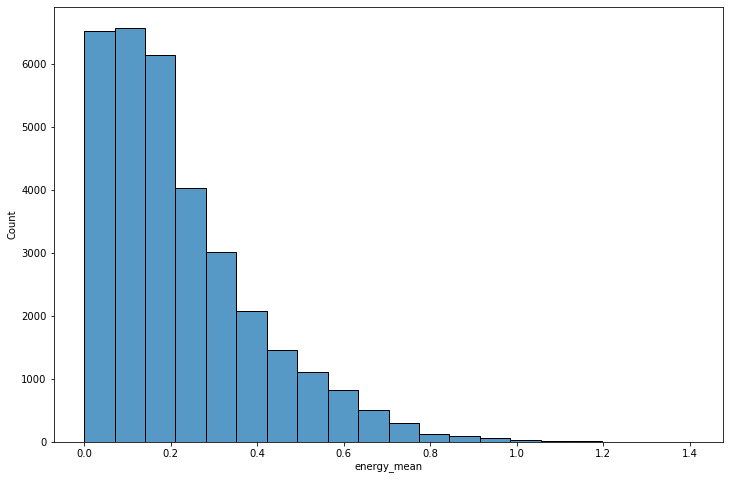

In [24]:
### Let's make a histogram
import seaborn as sns
from matplotlib import colors as mcolors

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colors_names = [name for name, color in colors.items()]

# print(colors_names)

plt.figure(figsize=(12,8))
sns.histplot(data=london, x = "energy_mean", bins=20, element="bars")

In [22]:
SMs = london['LCLid'].unique()
SMs

array(['MAC000113', 'MAC000301', 'MAC000309', 'MAC002509', 'MAC002510',
       'MAC002512', 'MAC002513', 'MAC002514', 'MAC002517', 'MAC002518',
       'MAC002519', 'MAC002522', 'MAC002525', 'MAC002530', 'MAC002539',
       'MAC002557', 'MAC002558', 'MAC002605', 'MAC002662', 'MAC002663',
       'MAC002666', 'MAC002676', 'MAC002702', 'MAC002750', 'MAC002754',
       'MAC002756', 'MAC002757', 'MAC002761', 'MAC002764', 'MAC002767',
       'MAC005269', 'MAC005270', 'MAC005274', 'MAC005313', 'MAC005317',
       'MAC005319', 'MAC005322', 'MAC005331', 'MAC005367', 'MAC005392',
       'MAC005400', 'MAC005403', 'MAC005404', 'MAC005405', 'MAC005407',
       'MAC005408', 'MAC005411', 'MAC005412', 'MAC005415', 'MAC005416'],
      dtype=object)

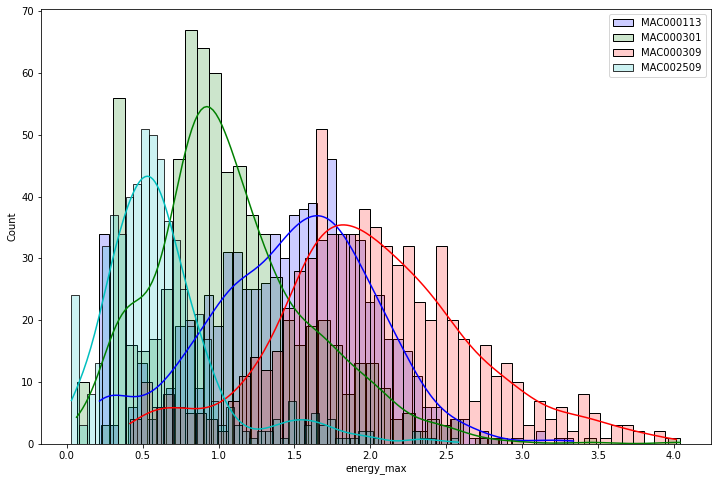

In [25]:

plt.figure(figsize=(12,8))


for i, SM in enumerate(SMs[:4]):
    sns.histplot(data = london[london['LCLid']== SM], x = "energy_max", kde=True, label= SM, color=colors_names[i], bins = 50, alpha=0.2)
    plt.legend( loc='best', bbox_to_anchor=((1,1)))

### Let's make a density plot

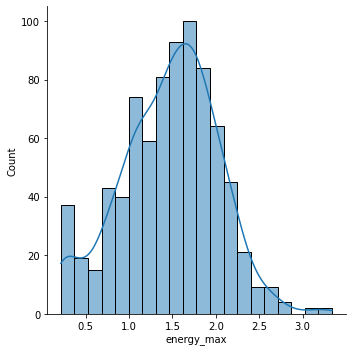

In [26]:
sns.displot(london.loc[london['LCLid']=='MAC000113']['energy_max'], kde=True)
plt.show()


https://seaborn.pydata.org/generated/seaborn.displot.html

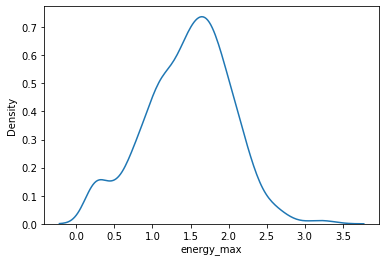

In [27]:

sns.kdeplot(london.loc[london['LCLid']=='MAC000113']['energy_max'])
plt.show()

<div style="background-color:#ccffcc; padding:10px; border-radius:5px;">

### <span style="color:blue">Exercise 4</span>
Plot in the same figure the density plot of the Energy_max for the last 5 end-users
    </div>

In [ ]:
# write your code here












## 3.2 Measures of central tendency: Mean, median and mode

Once we have a summary of the data used, some parameters that can be very useful to know how certain characteristics of our *dataset* are distributed are:
* Mean
* Median
* Mode

#### Mean

We can think of the mean as the center of gravity of the data of a distribution. Let's look at an example and discuss what information can be obtained and how it can help us or, conversely, misinform us if we are not careful.

In [28]:
import random
import numpy as np

population = [0,2,3,3,3,4,13]
sample = random.choices(population, k=3)  #Randomly select 4 values from the population.

mean_pop = np.mean(population)
mean_samp = np.mean(sample)

print('Mean Population:', mean_pop)
print('Media Sample:', mean_samp)
print(sample)

Mean Population: 4.0
Media Sample: 6.333333333333333
[3, 3, 13]


Pandas provide accesibility to common calculations, such as:

In [29]:
london['energy_max'].mean()

0.8823041228297687

#### Mean and Median

*netherlands* Dataset. 

Source: https://www.kaggle.com/datasets/lucabasa/dutch-energy/data


In [30]:
import pandas as pd
netherlands = pd.read_csv('Data/Electricity_Netherlands/coteq_electricity_2019.csv')
netherlands.dropna()
netherlands.head(5)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19,89.47,94.74,89,1x35,4037,89.47,0.0
1,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,40,100.00,97.50,80,1x35,2642,95.00,0.0
2,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16,100.00,100.00,100,1x35,1313,100.00,0.0
3,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,41,92.68,85.37,54,3x25,6405,92.68,0.0
4,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14,85.71,100.00,36,3x25,4742,100.00,0.0


If you want to obtain the average consumption of the whole dataset, you could calculate it as:

In [31]:
netherlands['annual_consume'].mean()

3971.755364806867

In [32]:
netherlands['annual_consume'].median()

3147.0

#### But if we take a good look at the *dataset* we can see that this average is not fair. Why?

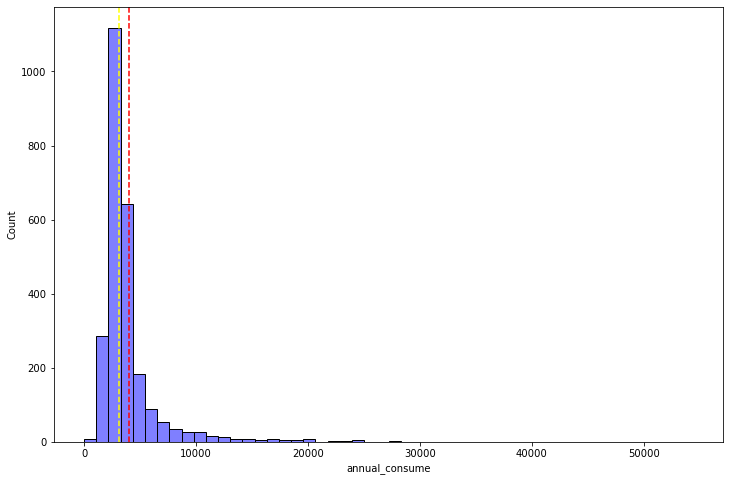

In [33]:
# PROFESSOR
# let's check for some max values and minimum
netherlands.describe()

# let's check histogram
plt.figure(figsize=(12,8))
sns.histplot(data = netherlands["annual_consume"], color=colors_names[0], bins = 50, alpha=0.5, label='Week')
plt.axvline(x=netherlands["annual_consume"].mean(), color='red', linestyle='--', label='Threshold')
plt.axvline(x=netherlands["annual_consume"].median(), color='yellow', linestyle='--', label='Threshold')

We have seen how there are times when computing the average, even if it can be done, would not be correct. At other times, what will happen is that we cannot compute the mean at all. For example

In this case, the **median** may be a good alternative measure.

Another advantage of the median is that it does not consider equally all elements of the distribution, which makes it more resistant to changes in the distribution.

#### Mode

We have seen that sometimes the mean will not give us the information we are looking for, or simply cannot be calculated and we will use the median. On other occasions, however, the mode can also be useful to us. For example:

In [34]:
netherlands['city'].head(5)

0    ENTER
1     GOOR
2     GOOR
3     GOOR
4     GOOR
Name: city, dtype: object

In [35]:
netherlands['city'].value_counts()

ALMELO       1577
OLDENZAAL     714
GOOR          271
ENTER           1
Name: city, dtype: int64

## 3.3 Variability

Let's look at two distributions:

In [36]:
import numpy as np

A=[4,4,4,4]
B=[0,8,0,8]

print('The mean of A is:',np.mean(A))
print('The mean of B is:',np.mean(B))

The mean of A is: 4.0
The mean of B is: 4.0


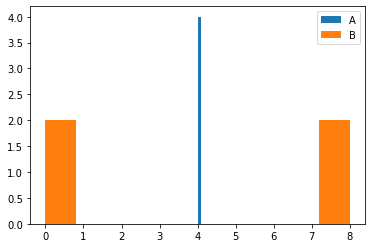

In [37]:
plt.hist(A, label="A")
plt.hist(B, label= "B")
plt.legend()

Indeed, two very different distributions can have the same mean.

What other parameter can help us to distinguish the two distributions? For example, the range:

In [38]:
range_A=max(A)-min(A)
range_B=max(B)-min(B)

print('The range of A is:',range_A)
print('The range of B is:',range_B)

The range of A is: 0
The range of B is: 8


But the range only considers two values, and it is not a good solution:

In [39]:
C=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,21]

range_C=max(C)-min(C)
print('The mean of C is:',np.mean(C))
print('The range of C is:',range_C)

The mean of C is: 2.176470588235294
The range of C is: 20


We see that we have a distribution with very little variability, but with a very high range. This is because it only considers two values of the distribution and not the whole distribution.

If we consider all values we can calculate:

<img src="Figures/variabilities.svg" alt="Drawing" style="width: 450px;"/>

To avoid this, we will use:

$$ Variance = \frac{1}{n} \sum_i (x_i - \mu)^2 $$

<div style="background-color:#ccffcc; padding:10px; border-radius:5px;">

### <span style="color:blue">Exercise 5</span>
Use the variance formula for the top three distributions. Write a function. What values are obtained?
    </div>

In [42]:
# We write the mean for all the distributions

dist1 = [1, 2, 8, 9]
dist2 = [3, 4, 6, 7]
dist3 = [5, 5, 5, 5]

In [45]:
# write your code here (variance function)

def var_func(dist):
    v = 0
    n = len(dist)
    m = np.mean(dist)
    
    for x in dist:
        summ = (x - m)**2
        v = v + summ
        
    return v/n


In [46]:
print('Variance Dist 1: ', var_func(dist1))
print('Variance Dist 2: ', var_func(dist2))
print('Variance Dist 3: ', var_func(dist3))

Variance Dist 1:  12.5
Variance Dist 2:  2.5
Variance Dist 3:  0.0


!!!! The problem with the variance is that it does not give a value that does not make any sense to us.

A shorter way: the variance method is `np.var()`

In [47]:
print('Variance Dist 1: ', np.var(dist1))
print('Variance Dist 2: ', np.var(dist2))
print('Variance Dist 3: ', np.var(dist3))

Variance Dist 1:  12.5
Variance Dist 2:  2.5
Variance Dist 3:  0.0


### Let's see another example

In [48]:
week_consum =[0, 7, 8, 5, 7]

print('The variance:', np.var(week_consum))

The variance: 8.24


For this, we use  **standard deviation**

Variance $$ \sigma^2 = \frac{1}{n} \sum_i (x_i - \mu)^2 $$

Standard Deviation $$ \sigma = \sqrt (\frac{1}{n} \sum_i (x_i - \mu)^2) $$


In [49]:
week_consum =[0, 7, 8, 5, 7]

print('The standard deviation is:', np.std(week_consum))
print('The mean is:', np.mean(week_consum))

The standard deviation is: 2.870540018881465
The mean is: 5.4


## Standard deviation in normal distributions and boxplots

<img src="Figures/boxplot_normal_dist.png" alt="Drawing" style="width: 600px;"/>

### Let's calculate the distribution and standard deviation for a sample: end user MAC000113, Energy Max

In [50]:
MAC000113_energy_max = london.loc[london['LCLid']=='MAC000113']['energy_max']

In [50]:
MAC000113_energy_max = london.loc[london['LCLid']=='MAC000113']['energy_max']

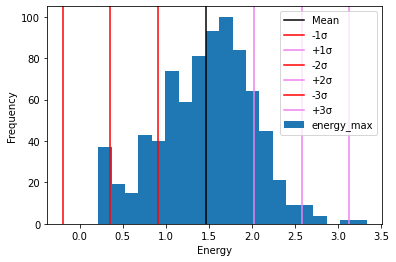

In [51]:
import matplotlib.pyplot as plt

mean = MAC000113_energy_max.mean()
st_dev = MAC000113_energy_max.std()
MAC000113_energy_max.plot.hist(bins=20)
plt.axvline(mean, color = 'black', label = 'Mean')
plt.axvline(mean - st_dev, color = 'Red', label = '-1σ')
plt.axvline(mean + st_dev, color = 'Violet', label = '+1σ')
plt.axvline(mean - 2*st_dev, color = 'Red', label = '-2σ')
plt.axvline(mean + 2*st_dev, color = 'Violet', label = '+2σ')
plt.axvline(mean - 3*st_dev, color = 'Red', label = '-3σ')
plt.axvline(mean + 3*st_dev, color = 'Violet', label = '+3σ')
plt.xlabel('Energy')
plt.legend()

<div style="background-color:#ccffcc; padding:10px; border-radius:5px;">

### <span style="color:blue">Exercise 6</span>
Show the boxplot
    </div>

In [ ]:
# Write your code here








### Let's check another example and distribution: energy max from population

In [ ]:
import matplotlib.pyplot as plt

mean = london['energy_max'].mean()
st_dev = london['energy_max'].std()
london['energy_max'].plot.hist(bins=20)
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean - st_dev, color = 'Red', label = '-1σ')
plt.axvline(mean + st_dev, color = 'Violet', label = '+1σ')
plt.axvline(mean - 2*st_dev, color = 'Red', label = '-2σ')
plt.axvline(mean + 2*st_dev, color = 'Violet', label = '+2σ')
plt.axvline(mean - 3*st_dev, color = 'Red', label = '-3σ')
plt.axvline(mean + 3*st_dev, color = 'Violet', label = '+3σ')
plt.xlabel('Energy')
plt.legend()

<div style="background-color:#ccffcc; padding:10px; border-radius:5px;">

### <span style="color:blue">Exercise 7</span>
Show the boxplot
    </div>

In [ ]:
# write your code here








<div style="background-color:#ccffcc; padding:10px; border-radius:5px;">

### <span style="color:blue">Exercise 8</span>
    
Show the boxplots of all endusers (LCLid) for the Energy Max. 
    
 + Which end-user has more variability?
 + Show the distribution of the user with higher variability according to the boxplot
    </div>

In [ ]:
# Your code here: BOXPLOT of all endusers for EnergyMax











In [ ]:
# Your code here: DISTRIBUTION for EnergyMax for Enduser with more variability 













<div style="background-color:#ccffcc; padding:10px; border-radius:5px;">

### <span style="color:blue">Exercise 9</span>

Create for MAC005331 two histograms in one Figure: one for energy_mean on week days and another for energy_mean on weekends.
    </div>

In [ ]:
# write your code here


